In [1]:
# import libraries
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
2.18.0-dev20240703


In [2]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2024-07-04 15:50:30--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv’

train-data.tsv      100%[===================>] 349.84K   440KB/s    in 0.8s    

2024-07-04 15:50:32 (440 KB/s) - ‘train-data.tsv’ saved [358233/358233]

--2024-07-04 15:50:32--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv’

valid-data.tsv      100%[===============

In [3]:
# read data
train_data = pd.read_csv(train_file_path, sep="\t", header=None)
test_data = pd.read_csv(test_file_path, sep="\t", header=None)

print("Original data:")
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print("\nTrain data label distribution:\n", train_data[0].value_counts())
print("\nTest data label distribution:\n", test_data[0].value_counts())

# Map labels
train_data[0] = train_data[0].map({'ham': 0, 'spam': 1})
test_data[0] = test_data[0].map({'ham': 0, 'spam': 1})

# Check after mapping
print("\nAfter mapping:")
print(train_data.head())
print(test_data.head())
print("\nTrain data label distribution:\n", train_data[0].value_counts())
print("\nTest data label distribution:\n", test_data[0].value_counts())

# Remove NaN values
train_data = train_data.dropna()
test_data = test_data.dropna()

# Check after removing NaN values
print("\nAfter removing NaN:")
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print("\nTrain data label distribution:\n", train_data[0].value_counts())
print("\nTest data label distribution:\n", test_data[0].value_counts())

# If data is not empty, proceed with tokenization and padding
if len(train_data) > 0 and len(test_data) > 0:
    # Convert text data to lists
    train_data_text = train_data[1].tolist()
    train_data_label = train_data[0].tolist()
    test_data_text = test_data[1].tolist()
    test_data_label = test_data[0].tolist()

    # Tokenize and pad sequences
    !pip install tensorflow
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences

    max_words = 1300
    max_length = 100

    tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
    tokenizer.fit_on_texts(train_data_text)

    train_sequences = tokenizer.texts_to_sequences(train_data_text)
    test_sequences = tokenizer.texts_to_sequences(test_data_text)

    train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
    test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

    # Convert labels to numpy arrays
    train_labels = np.array(train_data_label)
    test_labels = np.array(test_data_label)

    # Check final shapes
    print("\nFinal shapes:")
    print("train_padded shape:", train_padded.shape)
    print("train_labels shape:", train_labels.shape)
    print("test_padded shape:", test_padded.shape)
    print("test_labels shape:", test_labels.shape)
    
    print("\nFinal label distribution:")
    print("Train labels:\n", np.unique(train_labels, return_counts=True))
    print("Test labels:\n", np.unique(test_labels, return_counts=True))
else:
    print("Data is empty after preprocessing!")

Original data:
Train data shape: (4179, 2)
Test data shape: (1392, 2)

Train data label distribution:
 0
ham     3619
spam     560
Name: count, dtype: int64

Test data label distribution:
 0
ham     1205
spam     187
Name: count, dtype: int64

After mapping:
   0                                                  1
0  0  ahhhh...just woken up!had a bad dream about u ...
1  0                           you can never do nothing
2  0  now u sound like manky scouse boy steve,like! ...
3  0  mum say we wan to go then go... then she can s...
4  0  never y lei... i v lazy... got wat? dat day ü ...
   0                                                  1
0  0  i am in hospital da. . i will return home in e...
1  0         not much, just some textin'. how bout you?
2  0  i probably won't eat at all today. i think i'm...
3  0  don‘t give a flying monkeys wot they think and...
4  0                                who are you seeing?

Train data label distribution:
 0
0    3619
1     560
Name: count, d

Epoch 1/10


/home/vscode/.local/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


131/131 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.8452 - loss: 0.4081 - val_accuracy: 0.9641 - val_loss: 0.1338
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.9776 - loss: 0.0902 - val_accuracy: 0.9792 - val_loss: 0.0701
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.9893 - loss: 0.0504 - val_accuracy: 0.9835 - val_loss: 0.0635
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.9931 - loss: 0.0364 - val_accuracy: 0.9813 - val_loss: 0.0660
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9955 - loss: 0.0236 - val_accuracy: 0.9871 - val_loss: 0.0602
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.9977 - loss: 0.0132 - val_accuracy: 0.9842 - val_loss: 0.0543
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 14s 110ms/step - accuracy: 0.9988 - loss: 0.0160 - val_accuracy: 0.9806 - val_loss: 0.0917
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9981 - loss: 0.0113 - val_accura

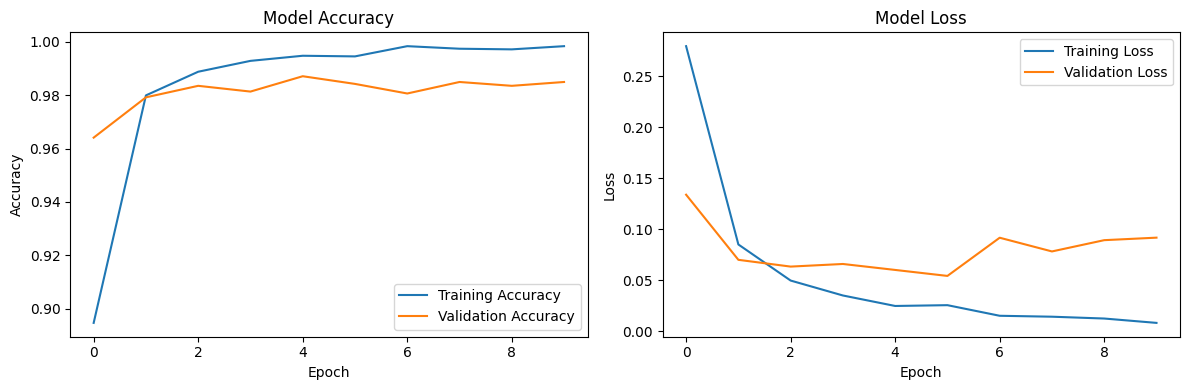

In [4]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(tokenizer.word_index)+1, 32, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history = model.fit(train_padded, train_labels, epochs=10, 
                    validation_data=(test_padded, test_labels),
                    batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_padded, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(message):
    # Tokenize and pad the message
    sequence = tokenizer.texts_to_sequences([message])
    padded = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')
    
    # Make prediction
    prediction = model.predict(padded)[0][0]
    
    # Convert prediction to label
    label = "spam" if prediction > 0.5 else "ham"
    
    return (prediction, label)

pred_text = "Buy more bond!"

prediction = predict_message(pred_text)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
(8.10193e-05, 'ham')


In [6]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
You passed the challenge. Great job!
